In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
import sys
import gc
import pickle
sys.version_info

sys.version_info(major=3, minor=5, micro=6, releaselevel='final', serial=0)

# Model : lightGBM

In [3]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Load Data

In [4]:
data = pd.read_pickle('data.pkl')
data = data[[
    'date_block_num',
    'shop_id',
    #'item_id',
    'item_cnt_month',
    'city_code',
    'item_category_id',
    'type_code','subtype_code',
    'item_cnt_month_lag_1','item_cnt_month_lag_2','item_cnt_month_lag_3','item_cnt_month_lag_6','item_cnt_month_lag_12',
    'item_avg_sale_last_6', 'item_std_sale_last_6',
    'item_avg_sale_last_12', 'item_std_sale_last_12',
    'shop_avg_sale_last_6', 'shop_std_sale_last_6',
    'shop_avg_sale_last_12', 'shop_std_sale_last_12',
    'category_avg_sale_last_12', 'category_std_sale_last_12',
    'city_avg_sale_last_12', 'city_std_sale_last_12',
    'type_avg_sale_last_12', 'type_std_sale_last_12',
    'subtype_avg_sale_last_12', 'subtype_std_sale_last_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1','date_item_avg_item_cnt_lag_2','date_item_avg_item_cnt_lag_3','date_item_avg_item_cnt_lag_6','date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1','date_shop_avg_item_cnt_lag_2','date_shop_avg_item_cnt_lag_3','date_shop_avg_item_cnt_lag_6','date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1',
    'date_item_city_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month','year',
    'item_shop_last_sale','item_last_sale',
    'item_shop_first_sale','item_first_sale',
]]

cat_feats = ['shop_id','city_code','item_category_id','type_code','subtype_code']

## 訓練集、校正集 產生

In [5]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

del data
gc.collect();

# 建立lightGBM模型 以gsearch尋找最佳參數
## 找到在num_leaves=140和max_depth=7時是最佳組合

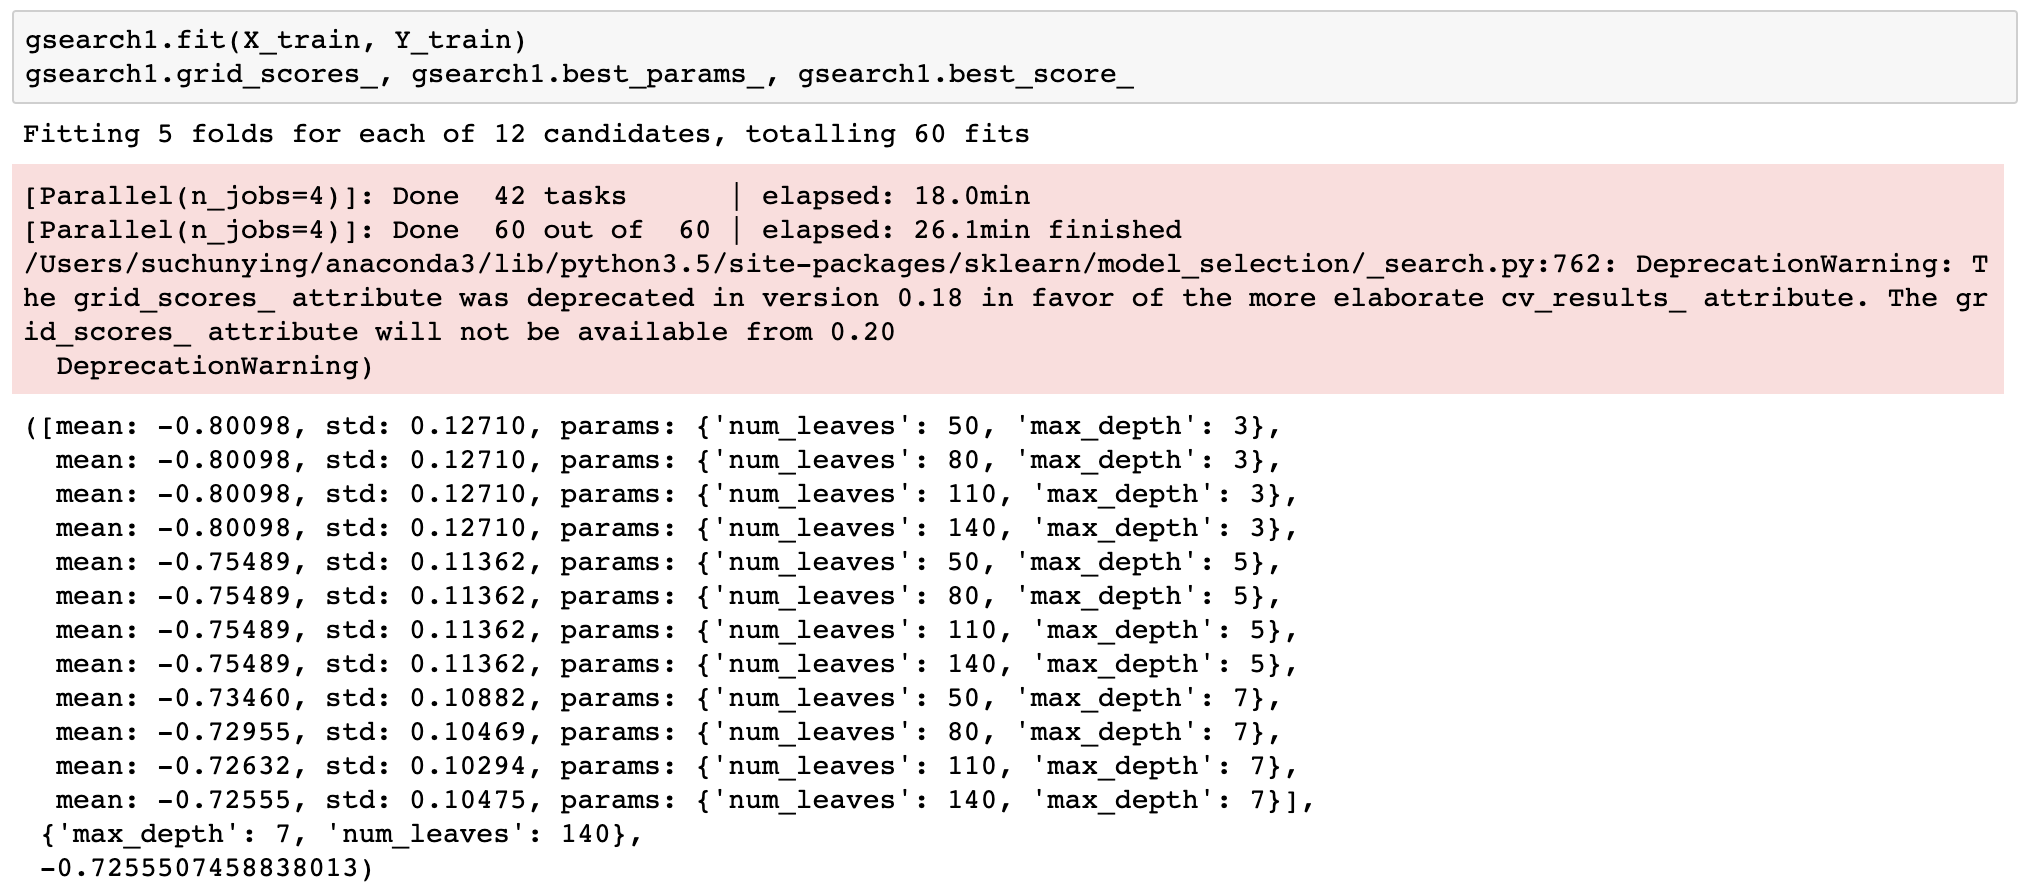

## 開始放入特徵訓練模型

In [6]:
ts = time.time()

model = LGBMRegressor(
    max_depth = 7,
    num_leaves = 140,
    n_estimators = 500,
    colsample_bytree=0.7,
    min_child_weight = 300,
    reg_alpha = 0.1,
    reg_lambda = 1,
    random_state = 42,
)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=10, 
    early_stopping_rounds = 40,
    categorical_feature = cat_feats) # use LGBM's build-in categroical features.

time.time() - ts

/Users/suchunying/anaconda3/lib/python3.5/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city_code', 'item_category_id', 'shop_id', 'subtype_code', 'type_code']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/Users/suchunying/anaconda3/lib/python3.5/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city_code', 'item_category_id', 'shop_id', 'subtype_code', 'type_code']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 40 rounds.
[10]	training's l2: 0.809988	training's rmse: 0.899993	valid_1's l2: 0.863665	valid_1's rmse: 0.929336
[20]	training's l2: 0.701285	training's rmse: 0.837428	valid_1's l2: 0.802006	valid_1's rmse: 0.895548
[30]	training's l2: 0.670365	training's rmse: 0.818758	valid_1's l2: 0.791338	valid_1's rmse: 0.889572
[40]	training's l2: 0.655034	training's rmse: 0.809342	valid_1's l2: 0.789285	valid_1's rmse: 0.888417
[50]	training's l2: 0.645729	training's rmse: 0.803573	valid_1's l2: 0.791646	valid_1's rmse: 0.889745
[60]	training's l2: 0.639214	training's rmse: 0.799509	valid_1's l2: 0.792937	valid_1's rmse: 0.89047
[70]	training's l2: 0.633604	training's rmse: 0.795992	valid_1's l2: 0.796098	valid_1's rmse: 0.892244
[80]	training's l2: 0.627492	training's rmse: 0.792144	valid_1's l2: 0.797576	valid_1's rmse: 0.893071
Early stopping, best iteration is:
[42]	training's l2: 0.653016	training's rmse: 0.808094	valid_1's l2: 0.788967	va

39.16171479225159